# [AI 오픈 이노베이션] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
        - [용어집](https://docs.python.org/ko/3/glossary.html)
        - [언어 레퍼런스](https://docs.python.org/ko/3/reference/index.html)
        - [자습서](https://docs.python.org/ko/3/tutorial/index.html)
    - [Numpy 공식문서]https://numpy.org/devdocs/
        - [Absolute Beginners Tutorial, 시작하는 사람들을 위한 튜토리얼](https://numpy.org/devdocs/user/absolute_beginners.html)
  
        - [Numpy tutorials](https://numpy.org/doc/stable/user/tutorials_index.html) 
---
0. [Recap](#Recap) <br/>
1. [Numpy2](#Numpy2) <br/>
      1.1 [ arange ](#arange)<br/>
      1.2 [repeat](#repeat)<br/>
      1.2 [ reshape ](#reshape)<br/>
      1.3 [ resize ](#resize)<br/>
      1.4 [ Image ](#image)<br/>
2. [Indexing](#Indexing) <br/>
      2.1 [ Array Indexing / slicing ](#Array-Indexing/slicing)<br/>
      2.2  [Boolean Indexing](#Boolean-Indexing)<br/>
      2.3  [Fancy Indexing](#Fancy-Indexing)<br/>
      2.4  [연습](#연습)<br/>
3. [차원 증가 방법](#차원-증가-방법) <br/>
      3.1  [shape](#shape)<br/>
      3.2  [reshape](#reshape)<br/>
      3.3  [None](#None)<br/>
      3.4  [newaxis](#newaxis)<br/>
      3.5 [expand_dims](#expand_dims)<br/>
4. [배열 연산](#배열-연산) <br/>
      4.1  [broadcasting](#broadcasting)<br/>






---

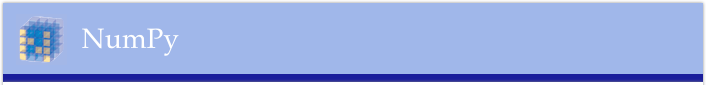
## Recap



### Numpy1
- 빠르고 쉽고 효율적으로 행렬/벡터 연산을 지원하는 library
- 모양, 타입을 알면 연산 가능
    * array
    * ndarray
    * zeros
    * ones
    * full
    * empty
    * eye
    * identity
    * linespace
    * logspace
        * shape
        * ndim
        * **size**
        * dtype
        * concatenate
        * **reshape(immutable성질)**
        * sequence
  --- 
 ## Numpy2

In [2]:
import numpy as np

- 벡터 행렬 연산에서  **연산하는 벡터/행렬 크기**가 중요
- python에서 지원하는것을 numpy에서도 지원하고 있음
    - python의 range를 numpy arange로 지원
    

### arange
- 주어진 구간에서 일정한 간격의 배열
- `arange(원소 갯수)`
- `arange(start =시작 , stop=끝 ,step= 등간격 )`


arange로 10개의 숫자로 이루어진 numpy.ndarray생성

In [11]:
a= np.arange(10) 
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
a.shape  #10x1 행벡터 (1차원 array)

(10,)

In [16]:
type(a)

numpy.ndarray

0~10까지 짝수로 이루어진 numpy.ndarray 생성 (간격:2)

In [6]:
np.arange(start=0,stop=10,step=2)

array([0, 2, 4, 6, 8])

0~10까지 홀수로 이루어진 numpy.ndarray 생성

In [18]:
np.arange(start=1,stop=10,step=2)

array([1, 3, 5, 7, 9])

### repeat
- repeat(반복횟수, axis= ) 

In [361]:
z=np.array((1,2,3))
z.repeat(2,0)

array([1, 1, 2, 2, 3, 3])

각 원소별 반복 횟수 지정

In [362]:
z.repeat((1,2,3)) 

array([1, 2, 2, 3, 3, 3])

### reshape
- **원소갯수가 동일**한 경우 원하는 형태(행,열의수)로 바꿈
- **immutable** 방식
    - 원래의 형태 보존
- `reshape( (행 , 열) )`

In [29]:
a.shape  #10,1

(10,)

In [27]:
a.size 

10

In [28]:
a.ndim

1

In [30]:
a.reshape((1,10)) #immutable 1x10=10개 원소는 동일하여 가능

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [10]:
a.reshape((2,5)) #immutable 2x5=10개 원소는 동일하여 가능

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [31]:
a.reshape((3,4))#ValueError:원소 갯수와 해당 3x4 행렬의 원소갯수(12)와 다르기 때문

ValueError: cannot reshape array of size 10 into shape (3,4)

In [104]:
a.reshape(10,0)   # 0 을 붙일 수없음  size=0 ㅇㅣ 되기 때문

ValueError: cannot reshape array of size 5 into shape (5,0)

In [59]:
a.reshape(1,-3) # 자동적으로 사이즈에 맞체 바꿔줌

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [64]:
a.reshape(-2,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

immutable방식으로 a 의 형태는 그대로

In [13]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### reshape 정렬 순서

- `reshape( array, newshape=(행,열), order )`
    - `order='C'` 행 우선 (디폴트)
        - 행 순서대로 첫 행 > 2번쨰 행 ... > 마지막 행에 정렬
        - C 언어 방식
 
    - `order='F'` 열 우선
        - 열 순서대로: 첫 열 > 2번쨰 열 ... > 마지마열로 정렬
        - Fortran 언어 방식
        
 아래 그림처럼 알파벳 모양으로 행,열 순서를 쉽게 기억할 수 있음

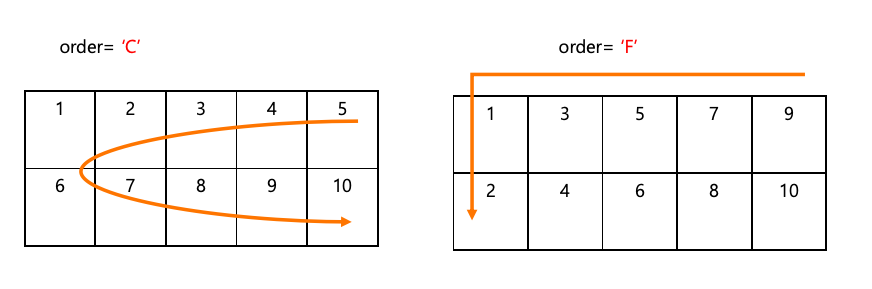

In [41]:
a= np.arange(10)
a.reshape(2,5) # method 방식 인스턴스로 쓰는애

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

C 방식 

In [42]:
np.reshape(a,(2,5)) # 파이썬에서는 method  function 동일 (function or method eg. len)  function > method

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [43]:
np.reshape(a,newshape=(2,5),order='C') 

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

F 방식 

In [44]:
a.reshape((2,5),order='F')

array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

numpy 공식문서의 Absolute Beginners  참고:
https://numpy.org/doc/stable/user/absolute_beginners.html
차원 바꾸는 다양한 기능 제공 
연산을 위해서 shape 맞춰야함 (기본)
기계학습(machine learning, ML) : 기본적으로 2차원 데이터 사용

### resize
- numpy의 array는 메모리가 연속적이기 때문에 앞 기준으로 해당 하는 크기만큼의 원소를 추출
    - 사이즈가 작은 경우 : 나머지 제거 
    - 사이즈가 큰 경우 : zero Padding( 0으로 채움)
- mutable 방식
    - 영구적으로 바꿈
-  `resize((행,열))`

In [61]:
a= np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
a.resize((5,2),refcheck=True)
a

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

사이즈가 작은 경우 나머지 제거

In [65]:
a.resize((1,4))
a

array([[0, 1, 2, 3]])

사이즈가 큰경우 Zero Padding으로 채움
-  임의로 0 원소로 채움 

In [66]:
a= np.arange(10)
a.resize((3,4) ) #2차원
a

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [8, 9, 0, 0]])

의미를 바꾸지 않고 모양을 바꿈

### Image
- 딥러닝 모델에서는 모델마다 2차원, 3차원 받는 경우 있음
- 데이터 구조에 따라서 차원변경 필요 
    * 흑백 2 or 3차원
    * 칼라 3차원
    * 영상 4차원

In [185]:
#차원 바꾸는 예시
from scipy import misc

In [186]:
fa=misc.face()
fa                 #numpy array 

array([[[121, 112, 131],
        [138, 129, 148],
        [153, 144, 165],
        ...,
        [119, 126,  74],
        [131, 136,  82],
        [139, 144,  90]],

       [[ 89,  82, 100],
        [110, 103, 121],
        [130, 122, 143],
        ...,
        [118, 125,  71],
        [134, 141,  87],
        [146, 153,  99]],

       [[ 73,  66,  84],
        [ 94,  87, 105],
        [115, 108, 126],
        ...,
        [117, 126,  71],
        [133, 142,  87],
        [144, 153,  98]],

       ...,

       [[ 87, 106,  76],
        [ 94, 110,  81],
        [107, 124,  92],
        ...,
        [120, 158,  97],
        [119, 157,  96],
        [119, 158,  95]],

       [[ 85, 101,  72],
        [ 95, 111,  82],
        [112, 127,  96],
        ...,
        [121, 157,  96],
        [120, 156,  94],
        [120, 156,  94]],

       [[ 85, 101,  74],
        [ 97, 113,  84],
        [111, 126,  97],
        ...,
        [120, 156,  95],
        [119, 155,  93],
        [118, 154,  92]]

#### misc.face()
* shape : 769 x 1024 x3인 3차원 텐서  
    - 3 =(R,G,B)  - > 모양 유추 가능
* dtype : unit8 

RGB
- RGB(Red, Green, Blue)색 모형은 빛의 삼원색을 이용하여 색을 표현하는 방식
- 디지털 이미지도 이것을 이용
- 붉은색, 초록색, 파랑색인 3 개의 차원을 겹쳐서 표현


In [111]:
fa.shape 

(768, 1024, 3)

In [112]:
fa.dtype

dtype('uint8')

matplotlib의 pyplot이용하여 해당 3차원 텐서를 그림으로 표현

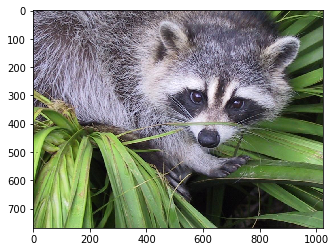

In [187]:
import matplotlib.pyplot as plt
plt.imshow(fa) #라쿤 

2차원으로 변경

In [189]:
fa= misc.face(gray=True) 
fa.shape

(768, 1024)

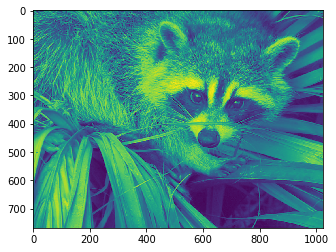

In [190]:
plt.imshow(fa) 

pyplot 은  색상정보가 없어 다른 옵션을 이용해서 그레이 스케일로 바꿈

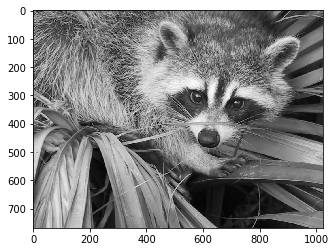

In [191]:
plt.imshow(fa, cmap='gray') 

reshape이용 3차원으로 변경

TypeError: Invalid shape (768, 1024, 1) for image data

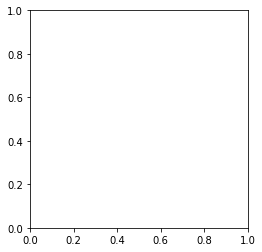

In [192]:
fa_3d=fa.reshape(768,1024,1) #3차원  :모양 안맞음
plt.imshow(fa_3d) 

In [193]:
fa.shape

(768, 1024)

In [197]:
fa_3d.shape

(768, 1024, 1)

## Indexing
### Array Indexing/slicing
numpy array 2d 인 경우 차례대로 들어감
- `array[행][열]`
- `array[행, 열]`



0번째 행 1번쨰 열 인덱싱

In [200]:
a= np.arange(6).reshape(2,3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [201]:
a[0][1]

1

In [202]:
a[0,1] 

1

2차원 행렬에서 0 ~ 1번째 행, 1 ~ 2번쨰 열 추출

In [203]:
a[0:2,1:3]   

array([[1, 2],
       [4, 5]])

1번째 열 추출

In [211]:
b=a[:,1:2]
b

array([[1],
       [4]])

In [212]:
b.shape

(2, 1)

In [213]:
b=a[ : , 1] #차원이 줄어듦
b  #행의 의미를 유지하지 못함

array([1, 4])

In [214]:
b.shape 

(2,)

In [215]:
b=np.expand_dims(a[ : , 1],axis=1)
b

array([[1],
       [4]])

In [216]:
b.shape

(2, 1)

### Boolean Indexing 
T/F 나오는 조건을 이용하여 인덱싱 
- 해당 조건에 맞는 각 원소값 만 추출
- numpy는 True or False 대신에  1 or 0을 대신 쓸 수 없음 
- numpy 는 2개 이상의 조건 비교 a<x<b 
- `array[ boolean 조건식 ]`
- `array[ boolean 값]`

In [219]:
a=np.arange(9).reshape(3,3)
a>1

array([[False, False,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [220]:
a[a>1]  #해당조건에 맞는(True)만 추출


array([2, 3, 4, 5, 6, 7, 8])

array크기와 boolean 값 행렬의 크기 동일한 경우

In [221]:
a[np.array([[False, False,  True],
           [ True,  True,  True],
           [ True,  True,  True]])]

array([2, 3, 4, 5, 6, 7, 8])

array크기와 boolean 값 행렬의 크기 상이한 경우 행 기준

In [240]:
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [228]:
bool=[False, False,  True] #2번째 행
a[bool]  

array([[6, 7, 8]])

In [241]:
bool=[False,  True] #IndexError:행,열 길이와 달라 불가
a[bool]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 3 but corresponding boolean dimension is 2

2개의 boolean 조건식 이용

예시.  5< a < 13에 속하는 원소: 6,7,8,9,10,11,12 

In [191]:
a=np.arange(20).reshape(4,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [192]:
a[ (5<a)&(a<13)] 

array([ 6,  7,  8,  9, 10, 11, 12])

In [244]:
a[ 5<a & a<13] # () 로 구분 반드시 필요

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [246]:
# numpy에서는 3개값 비교지원 못함
a=6
if 5 <a< 10:
    print('파이썬에서는 3개의 값 비교지원 함')
else: 
    print('0')

파이썬에서는 3개의 값 비교지원 함


### Fancy Indexing
- 차원/위치도 바꿀수 있음
- **차원 그대로 유지**
    - python의 indexing은 차원 감소
- boolean indexing지원 
- `array[[ n 번째 행 ]] `
- `array[[행],[열]]`

In [261]:
a= np.arange(9).reshape(3,3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

행기준 추출

In [280]:
a[0]   #python indexing 1차원 

array([0, 1, 2])

In [255]:
a[[0]] #Fancy indexing 2차원(유지)

array([[0, 1, 2]])

In [258]:
a[[0,2,1]]   #행렬 순서 바꾸기 가능

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

In [256]:
a[[2,0]]  #2,0번째 행 (순서 바꾸기)

array([[6, 7, 8],
       [0, 1, 2]])

In [257]:
a[[0:2]]  # slicing 은 불가

SyntaxError: invalid syntax (<ipython-input-257-d273d0cb3a76>, line 1)

열기준 추출

In [271]:
a[...,[2,0]]

array([[2, 0],
       [5, 3],
       [8, 6]])

In [265]:
a[:,[2,0]]

array([[2, 0],
       [5, 3],
       [8, 6]])

원소 추출

In [282]:
a[[2],[2]]

array([8])

In [273]:
a[:,:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [272]:
a[...]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

boolean indexing 지원

In [285]:
a[[True, True,False]]

array([[0, 1, 2],
       [3, 4, 5]])

array 차월에 따른 인덱싱/슬라이싱

### 연습
##### 2차원 행렬 슬라이싱/인덱싱 연습
- 인덱싱, 슬라이싱 같이 쓰기 가능
- boolean indexing
- fancy indexing 

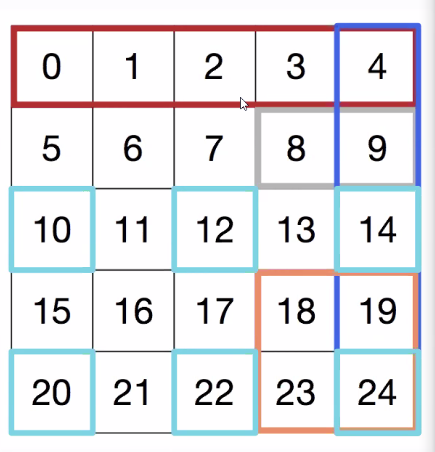


In [287]:
x= np.arange(25).reshape(5,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [202]:
x[:,:]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [206]:
x[...]  # 위의 :,: == ... 과 동일 (차원 상관 없음! :,:,:, 도 가능)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

[0,1,2,3,4] 추출

In [199]:
x[0,:] #1치원

array([0, 1, 2, 3, 4])

In [207]:
x[0,...]  #관례상 ...  : 두개 이상

array([0, 1, 2, 3, 4])

In [200]:
x[0]  # 위와 동일한 코드

array([0, 1, 2, 3, 4])

In [198]:
x[[0]] #2차원

array([[0, 1, 2, 3, 4]])

In [153]:
a[a<=1]

array([0, 1])

In [151]:
a+a+a

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

[4,9,14,19,24] 추출

In [214]:
x[:,4]

array([ 4,  9, 14, 19, 24])

In [215]:
x[:,-1]

array([ 4,  9, 14, 19, 24])

In [220]:
np.expand_dims(x[:,4], axis=1)

array([[ 4],
       [ 9],
       [14],
       [19],
       [24]])

In [216]:
x[:,-1:]

array([[ 4],
       [ 9],
       [14],
       [19],
       [24]])

[8,9] 추출

In [209]:
x[1,3:5]

array([8, 9])

In [213]:
x[1, 3:]

array([8, 9])

[18,19],[23,24]

In [224]:
x[-2:,-2:]

array([[18, 19],
       [23, 24]])

In [226]:
x[3:,3:]

array([[18, 19],
       [23, 24]])

[1, 3, 5]

In [228]:
a=[1,2,3,4,5]
a[::2]  # 2개 마다

[1, 3, 5]

[5, 4, 3, 2, 1]

In [229]:
a[::-1] #reverse 거꾸로

[5, 4, 3, 2, 1]

[0, 2, 4],
[5, 7, 9]]



In [232]:
x[:2 , ::2]

array([[0, 2, 4],
       [5, 7, 9]])

[[ 0,  2,  4],
       [10, 12, 14],
       [20, 22, 24]]

In [234]:
x [ ::2, ::2]

array([[ 0,  2,  4],
       [10, 12, 14],
       [20, 22, 24]])

In [235]:
x[[0,2,4]][:,::2]  #fancy indexing + slicing

array([[ 0,  2,  4],
       [10, 12, 14],
       [20, 22, 24]])

[ 7, 13, 19]

In [244]:
x[[1,2,3],[2,3,4]]  #fancy indexing 응용 [ [행],[열]]

array([ 7, 13, 19])

[ 8, 16]

In [251]:
x[[1,3 ],[3,1]]

array([ 8, 16])

[[15, 16, 18],
       [20, 21, 23]]

In [254]:
x[3:, [0,1,3]]

array([[15, 16, 18],
       [20, 21, 23]])

In [289]:
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [293]:
x[[3,4],[0,1,3]]  #fancy indexing 은 불가

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

### 차원 증가 방법
1. `array.shape= (2,3,**1**)`
2. `array.reshap(2,3,**1**)`
2. `array[None]` 
2. `array[np.newaxis]`
3. - `tf.expand_dims( input , axis= , name =None)`
  -  `np.expand_dims( input , axis=  )`

  - 계산 편의를 위해서 차원 변화시키는게 필요 (다양한 방식이 있음) 

### shape
- 행렬의 행,열 크기
    - 추가 가능 
- `array.shape= ( n ,m , 1 )`

In [369]:
x=np.arange(6)
x #1차원

array([0, 1, 2, 3, 4, 5])

In [366]:
x.shape

(6,)

In [372]:
x.shape= (2,3,1)
x

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

### reshape  
- 원하는 변경형태에 원하는 axis 에 1 추가
- shape과 비슷한 원리

In [370]:
x.reshape(2,3,1)

array([[[0],
        [1],
        [2]],

       [[3],
        [4],
        [5]]])

### None
- 존재 없음(반환 없음)
-  의미가 불분명하여 `newaxis` 사용
- `array[None]`

In [299]:
None #존재가 없으며 반환 없음

In [301]:
x[None]           #2차원

array([[0, 1, 2, 3, 4, 5]])

### newaxis
- 존재 없음 (반환 없음)
-  아무것도 인덱싱하지않고 **차원 증가**
- `array[np.newaxis]`

In [302]:
np.newaxis is None#NoneType

True

In [303]:
x[np.newaxis]  #아무것도 인덱싱하지않으면 차원 증가 

array([[0, 1, 2, 3, 4, 5]])

In [304]:
x[np.newaxis,:] # 행차원 증가 1 ->2 차원

array([[0, 1, 2, 3, 4, 5]])

In [305]:
x[:,np.newaxis]  # 열 차원 증가 1 ->2 차원

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

### exapand_dims
- 행렬을 **각 차원별로 axis 기준으로 차원 추가**
- `exapand_dims( ,axis=)`
    * 1차원 : axis= 0,1
    * 2차원 :axis= 0,1,2
    * 3차원 :axis= 0,1,2,3


#### Axis

아래 그림 참조
- 각 차원별로 방향을 의미  
    
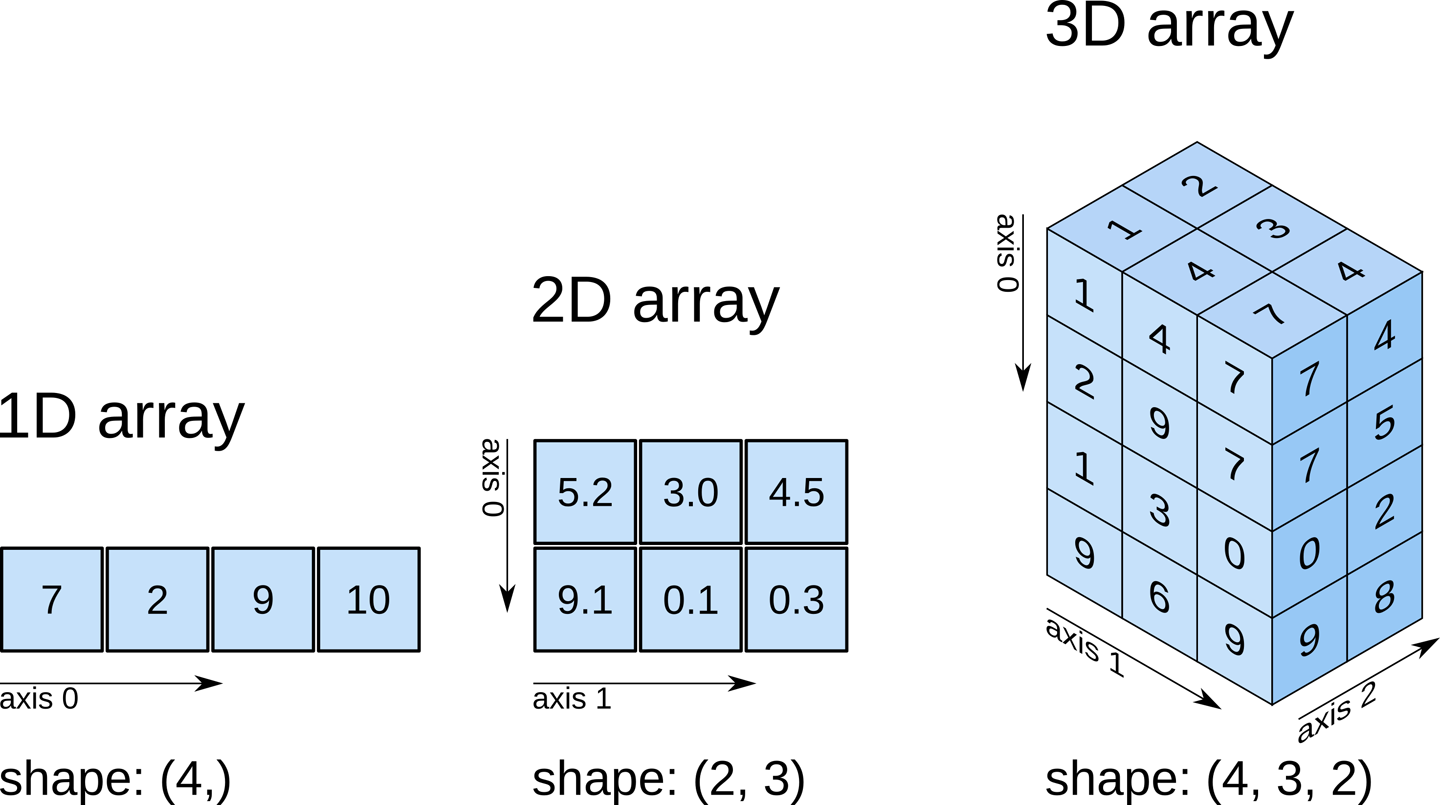

1차원

In [169]:
a=np.array((7,2,9,10))
a

array([ 7,  2,  9, 10])

In [170]:
a.shape

(4,)

1차원 axis=0 위치에 차원 추가

In [172]:
b=np.expand_dims(a,axis=0) #2차원

In [173]:
b.shape    #1x4

(1, 4)

In [174]:
b

array([[ 7,  2,  9, 10]])

1차원 axis=1 위치에 차원 추가

In [175]:
b=np.expand_dims(a,axis=1) #2차원

In [176]:
b.shape    # 4x1

(4, 1)

In [177]:
b

array([[ 7],
       [ 2],
       [ 9],
       [10]])

2차원

In [161]:
b=np.arange(10).reshape(2,5)
b #2차원

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [98]:
b.sum(axis=0) #열별로 계산

array([ 5,  7,  9, 11, 13])

In [99]:
b.sum(axis=1)  #행별로 계산

array([10, 35])

In [100]:
b.shape

(2, 5)

In [126]:
c=np.expand_dims(b,axis=0)  #행마다

array([[[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]])

In [127]:
d=np.expand_dims(b,axis=1)  #열마다

array([[[0, 1, 2, 3, 4]],

       [[5, 6, 7, 8, 9]]])

In [148]:
e= np.expand_dims(b,axis=2)

array([[[[ 0,  1]],

        [[ 2,  3]],

        [[ 4,  5]]],


       [[[ 6,  7]],

        [[ 8,  9]],

        [[10, 11]]]])

각 axis위치에 새로 추가 된 것을 알수 있음

In [149]:
c.shape, d.shape, e.shape

((1, 2, 3, 2), (2, 1, 3, 2), (2, 3, 2, 1))

3차원

In [134]:
a= np.arange(12)
np.expand_dims(a,1).shape # 2차원 12x1

(12, 1)

In [135]:
b=a.reshape((2,3,2))
b

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [141]:
b.shape

(2, 3, 2)

In [136]:
c=np.expand_dims(b, axis=0)
c

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]])

In [142]:
c.shape

(1, 2, 3, 2)

In [137]:
d=np.expand_dims(b, axis=1)
d

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5]]],


       [[[ 6,  7],
         [ 8,  9],
         [10, 11]]]])

In [143]:
d.shape

(2, 1, 3, 2)

In [144]:
e=np.expand_dims(b, axis=2)
e

array([[[[ 0,  1]],

        [[ 2,  3]],

        [[ 4,  5]]],


       [[[ 6,  7]],

        [[ 8,  9]],

        [[10, 11]]]])

In [145]:
e.shape

(2, 3, 1, 2)

In [146]:
e=np.expand_dims(b, axis=3)
e

array([[[[ 0],
         [ 1]],

        [[ 2],
         [ 3]],

        [[ 4],
         [ 5]]],


       [[[ 6],
         [ 7]],

        [[ 8],
         [ 9]],

        [[10],
         [11]]]])

In [147]:
e.shape

(2, 3, 2, 1)

- axis=0 :행기준

In [306]:
np.expand_dims(x,0) #2차원

array([[0, 1, 2, 3, 4, 5]])

In [307]:
np.expand_dims(x, axis=1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]])

## 배열 연산

### broadcasting
- 상수, 1차 array(벡터)를 형태 맞게 변환하여 연산

- 행렬 연산에서는 행,열 사이즈가 맞아야 연산이 됨. 이러한 문제때문에 broadcasting 이 자동으로 사이즈를 맞춰줌
 - 벡터, 행렬

1. 스칼라 연산
    - element wise
        - 각 원소별로 계산

In [351]:
x=np.arange(6).reshape((2,3))
x

array([[0, 1, 2],
       [3, 4, 5]])

In [321]:
x+1

array([[1, 2, 3],
       [4, 5, 6]])

In [332]:
x + np.ones((2,3)) #2x3 의 1로 이루어진 행렬과 동일

array([[1., 2., 3.],
       [4., 5., 6.]])

In [334]:
x + np.array([[1, 1, 1],
              [1, 1, 1]])


array([[1, 2, 3],
       [4, 5, 6]])

2. 벡터(1d array ) 연산
    -  크기 동일 해야함

행별로 합

In [336]:
z=np.array([1,2,3])  #각 행에 더함

In [337]:
x+z

array([[1, 3, 5],
       [4, 6, 8]])

In [338]:
x + np.array([[1,2,3],
            [1,2,3]])

array([[1, 3, 5],
       [4, 6, 8]])

열 별로 합

In [352]:
x+np.array([[0],[1]])


array([[0, 1, 2],
       [4, 5, 6]])

In [356]:
x+ np.array([[0,0,0],
              [1,1,1]])

array([[0, 1, 2],
       [4, 5, 6]])

3. 행렬의 연산
    - 행렬의 합: 행,열 크기가 동일해야함
    - 행렬의 곱: 앞의 행렬 의 열과 뒤의 행렬의 행 동일(추후 다룰 예정)

In [340]:
y=np.arange(6).reshape(3,2)
y

array([[0, 1],
       [2, 3],
       [4, 5]])

행렬의 합

In [341]:
x + y

ValueError: operands could not be broadcast together with shapes (2,3) (3,2) 

행렬의 곱

In [346]:
x@y #  3x 2 행렬 @ 2x 3헹렬 = 2 x2 행렬

array([[10, 13],
       [28, 40]])